THE SYRIATEL CUSTOMER CHURN 
project by Phoebe Wawire 
CLASS OF DSF-PT7

A.THE PROBLEM STATEMENT

I want to predict whether a customer with the company named SyriaTel churn will stop doing business with them based on various factors.
 My Audience is the telecom business who are interested to know how much money they will loose when customers donot stick around for long. 
 My target variable will be categorical with two classes, labeled as 1 for churn and 0 for no churn.

B. DATA COLLECTION

1. Import libraries

In [744]:
import pandas as pd
import numpy as np  
import seaborn as sns
from hashlib import sha256
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


2. Loading the dataset

In [745]:
# Load the dataset
df = pd.read_csv("C:\\Users\\User\\OneDrive\\Desktop\\bigml_59c28831336c6604c800002a.csv")

C. EXPLORING THE DATA ANALYSIS(EDA)

1. View thw dataset dimesions

In [746]:
#view dimensions of dataset
df.shape

(3333, 21)

It shows there are 3333 instances and 21 variables in the data set.

2. Preview the dataset

In [747]:
#preview the dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Summary of the 21 columns of the dataset
1 Boolean column
8 Floating Point columns
8 Integer columns
4 Object (String) columns

Churn is the target variable.

3. Check names of the columns

In [748]:
col_names = df.columns
col_names

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

4. Viewing the summary of the datasets

In [749]:
#view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Types of variables
I will sort the dataset into data types. There are a mixture of categorical, numerical, intergers and boolean variables in the dataset. Categorical variables have data type object, 
Numerical variables have data type float64,
Boolean variables have data type bool and
Intergers have data type int64


5. Finding the categorical variables

In [750]:
#find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 4 categorical variables

The categorical variables are : ['state', 'phone number', 'international plan', 'voice mail plan']


5. i. Viewing the categorical variables

In [751]:
#view the categorical variables
df[categorical].head()

,state,phone number,international plan,voice mail plan
0,KS,382-4657,no,yes
1,OH,371-7191,no,yes
2,NJ,358-1921,no,no
3,OH,375-9999,yes,no
4,OK,330-6626,yes,no


Summary of categorical variables

There are 4 categorical variables. These are; state, phone number, international plan and voice mail plan

There are 2 binary categorical variables - International plan and Voice mail plan.


We will explore problems within categorical variables

5. ii. Missing values in categorical variables

In [752]:
# check missing values in categorical variables
df[categorical].isnull().sum()

state                 0
phone number          0
international plan    0
voice mail plan       0
dtype: int64

There are no missing values in categorical variables

5. iii. Viewing the frequencies of categorical variables

In [753]:
# view frequency of categorical variables
for var in categorical: 
    
    print(df[var].value_counts())

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
VT     73
ID     73
TX     72
UT     72
IN     71
KS     70
MD     70
NC     68
MT     68
NJ     68
NV     66
CO     66
WA     66
MS     65
MA     65
RI     65
AZ     64
MO     63
FL     63
ME     62
NM     62
ND     62
NE     61
DE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64
418-3135    1
342-6316    1
396-1278    1
396-2867    1
374-7787    1
           ..
388-7355    1
364-8731    1
395-5285    1
354-2762    1
417-5067    1
Name: phone number, Length: 3333, dtype: int64
no     3010
yes     323
Name: international plan, dtype: int64
no     2411
yes     922
Name: voice mail plan, dtype: int64


5. iv. Viewing the frequencies distribution of the categorical variables

In [754]:
# view frequency distribution of categorical variables
for var in categorical: 
    
    print(df[var].value_counts()/np.float64(len(df)))

WV    0.031803
MN    0.025203
NY    0.024902
AL    0.024002
WI    0.023402
OH    0.023402
OR    0.023402
WY    0.023102
VA    0.023102
CT    0.022202
MI    0.021902
VT    0.021902
ID    0.021902
TX    0.021602
UT    0.021602
IN    0.021302
KS    0.021002
MD    0.021002
NC    0.020402
MT    0.020402
NJ    0.020402
NV    0.019802
CO    0.019802
WA    0.019802
MS    0.019502
MA    0.019502
RI    0.019502
AZ    0.019202
MO    0.018902
FL    0.018902
ME    0.018602
NM    0.018602
ND    0.018602
NE    0.018302
DE    0.018302
OK    0.018302
SD    0.018002
SC    0.018002
KY    0.017702
IL    0.017402
NH    0.016802
AR    0.016502
GA    0.016202
DC    0.016202
HI    0.015902
TN    0.015902
AK    0.015602
LA    0.015302
PA    0.013501
IA    0.013201
CA    0.010201
Name: state, dtype: float64
418-3135    0.0003
342-6316    0.0003
396-1278    0.0003
396-2867    0.0003
374-7787    0.0003
             ...  
388-7355    0.0003
364-8731    0.0003
395-5285    0.0003
354-2762    0.0003
417-5067    0.000

Number of labels: cardinality
The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

5. v. Checking for cardinality in the categorical variables

In [755]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

state  contains  51  labels
phone number  contains  3333  labels
international plan  contains  2  labels
voice mail plan  contains  2  labels


We can see that there is a phone number variable which needs to be preprocessed due to it's higher cardinality
All the other variables contain relatively smaller number of variables.

I will encode the phone numbers since they are identify unique customers, i will encode it using hashing.

Exploring variables one by one; we start with State

1. State

In [756]:
# Check the data type of the 'state' column
print("Data type of 'state' column:")
print(df["state"].dtype)

Data type of 'state' column:
object


In [757]:
# Example DataFrame with state abbreviations
df = pd.DataFrame({'state': ['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN',
                             'RI', 'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 
                             'AZ', 'SC', 'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 
                             'AR', 'WI', 'OR', 'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 
                             'WA', 'NM', 'NV', 'DC', 'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 
                             'ND']})

# Initialize LabelEncoder
le = LabelEncoder()
# Fit and transform the 'state' column
df['state_numeric'] = le.fit_transform(df['state'])

# Display the DataFrame and the mapping of labels to integers
print(df.head())
print(f"Classes: {le.classes_}")
print(f"Mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Check the data type of the 'state' column after conversion
print("Data type of 'state' column after conversion:")
print(df['state'].dtype)

# Output the modified DataFrame
print(df)

  state  state_numeric
0    KS             16
1    OH             35
2    NJ             31
3    OK             36
4    AL              1
Classes: ['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']
Mapping: {'AK': 0, 'AL': 1, 'AR': 2, 'AZ': 3, 'CA': 4, 'CO': 5, 'CT': 6, 'DC': 7, 'DE': 8, 'FL': 9, 'GA': 10, 'HI': 11, 'IA': 12, 'ID': 13, 'IL': 14, 'IN': 15, 'KS': 16, 'KY': 17, 'LA': 18, 'MA': 19, 'MD': 20, 'ME': 21, 'MI': 22, 'MN': 23, 'MO': 24, 'MS': 25, 'MT': 26, 'NC': 27, 'ND': 28, 'NE': 29, 'NH': 30, 'NJ': 31, 'NM': 32, 'NV': 33, 'NY': 34, 'OH': 35, 'OK': 36, 'OR': 37, 'PA': 38, 'RI': 39, 'SC': 40, 'SD': 41, 'TN': 42, 'TX': 43, 'UT': 44, 'VA': 45, 'VT': 46, 'WA': 47, 'WI': 48, 'WV': 49, 'WY': 50}
Data type of 'state' column after conversion:
object
   state  state_numeric
0     

In [758]:
# print number of labels in State variable
print('state contains', len(df["state"].unique()), 'labels')
# check labels in location variable
df.state.unique()

state contains 51 labels


array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [759]:
# check frequency distribution of values in Location variable
df["state"].value_counts()

AR    1
NH    1
AK    1
CA    1
LA    1
DE    1
RI    1
WV    1
CT    1
MA    1
ME    1
NC    1
VT    1
NE    1
ND    1
KY    1
UT    1
MD    1
WY    1
MI    1
GA    1
MO    1
WA    1
NJ    1
IN    1
CO    1
TN    1
PA    1
FL    1
SD    1
OR    1
ID    1
MS    1
MN    1
NM    1
AZ    1
NV    1
SC    1
MT    1
HI    1
IA    1
OK    1
WI    1
KS    1
NY    1
TX    1
IL    1
AL    1
OH    1
VA    1
DC    1
Name: state, dtype: int64

2. Phone number

In [760]:
# Sample DataFrame creation (replace this with your actual DataFrame)
data = {'phone number': ['(123) 456-7890', '987-654-3210', '5551234567']}
df = pd.DataFrame(data)

# Check the data type of the 'phone number' column
print("Data type of 'phone number' column before conversion:")
print(df['phone number'].dtype)

Data type of 'phone number' column before conversion:
object


In [761]:
# Clean the 'phone number' column by removing non-numeric characters
df['phone number'] = df['phone number'].str.replace(r'\D+', '', regex=True)  # Remove non-numeric characters

# Convert the 'phone number' column to numeric (as integers, for instance)
df['phone number'] = pd.to_numeric(df['phone number'], errors='coerce')

# Check the data type of the 'phone number' column after conversion
print("Data type of 'phone number' column after conversion:")
print(df['phone number'].dtype)

# Output the modified DataFrame
print(df)

Data type of 'phone number' column after conversion:
int64
   phone number
0    1234567890
1    9876543210
2    5551234567


In [762]:
# print number of labels in phone number variable
print('phone number contains', len(df['phone number'].unique()), 'labels')
# check labels in phone number variable
df['phone number'].unique()

phone number contains 3 labels


array([1234567890, 9876543210, 5551234567], dtype=int64)

In [763]:
# check frequency distribution of values in phone number variable
df['phone number'].value_counts()

9876543210    1
1234567890    1
5551234567    1
Name: phone number, dtype: int64

3. International Plan

In [764]:
# Sample DataFrame creation (replace with your actual DataFrame loading code)
data = {
    
    'international plan': ['no', 'yes', 'no']  # Sample data for the 'international plan' column
}

df = pd.DataFrame(data)

# Check the data type of the 'international plan' column
print("Data type of 'international plan' column before conversion:")
print(df['international plan'].dtype)

Data type of 'international plan' column before conversion:
object


In [765]:
# Convert 'international plan' column to numeric codes using factorize
df['international plan'], unique = pd.factorize(df['international plan'])

# Print the DataFrame with the converted column
print("\nDataFrame with 'international plan' converted to numeric:")
print(df)

# Print the unique values mapping
print("\nUnique values mapping:")
print(dict(zip(unique, range(len(unique)))))

# Check the data type of the 'phone number' column after conversion
print("Data type of 'international plan' column after conversion:")
print(df['international plan'].dtype)

# Output the modified DataFrame
print(df)


DataFrame with 'international plan' converted to numeric:
   international plan
0                   0
1                   1
2                   0

Unique values mapping:
{'no': 0, 'yes': 1}
Data type of 'international plan' column after conversion:
int64
   international plan
0                   0
1                   1
2                   0


In [766]:
# print number of labels in international plan variable
print('international plan contains', len(df['international plan'].unique()), 'labels')
# check labels in phone number variable
df['international plan'].unique()

international plan contains 2 labels


array([0, 1], dtype=int64)

In [767]:
# check frequency distribution of values in phone number variable
df['international plan'].value_counts()

0    2
1    1
Name: international plan, dtype: int64

4. Voice mail plan

In [768]:
# Sample DataFrame creation
data = {
    'phone number': ['(123) 456-7890', '987-654-3210', '5551234567'],
    'voice mail plan': ['no', 'yes', 'no']  # Sample data
}

df = pd.DataFrame(data)

# Check the data type of the 'voice mail plan' column before conversion
print("Data type of 'voice mail plan' column before conversion:")
print(df['voice mail plan'].dtype)

Data type of 'voice mail plan' column before conversion:
object


In [769]:
# Convert 'voice mail plan' column to numeric codes using factorize
df['voice mail plan'], unique = pd.factorize(df['voice mail plan'])

# Print the DataFrame with the converted column
print("\nDataFrame with 'voice mail plan' converted to numeric:")
print(df)

# Print the unique values mapping
print("\nUnique values mapping:")
print(dict(zip(unique, range(len(unique)))))

# Check the data type of the 'voice mail plan' column after conversion
print("Data type of 'voice mail plan' column after conversion:")
print(df['voice mail plan'].dtype)


DataFrame with 'voice mail plan' converted to numeric:
     phone number  voice mail plan
0  (123) 456-7890                0
1    987-654-3210                1
2      5551234567                0

Unique values mapping:
{'no': 0, 'yes': 1}
Data type of 'voice mail plan' column after conversion:
int64


In [770]:
# check frequency distribution of values in voice mail plan variable
df['voice mail plan'].value_counts()

0    2
1    1
Name: voice mail plan, dtype: int64

In [771]:
# Sample DataFrame creation (replace with your actual DataFrame loading code)
data = {
    'phone number': ['(123) 456-7890', '987-654-3210', '5551234567'],
    'international plan': ['no', 'yes', 'no'],
    'voice mail plan': ['no', 'yes', 'no']
}

df = pd.DataFrame(data)

# Function to convert categorical columns to numeric
def convert_categorical_to_numeric(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            # Convert categorical data to numeric
            df[column], unique = pd.factorize(df[column])
            print(f"Converted '{column}' to numeric. Unique values mapping:")
            print(dict(zip(unique, range(len(unique)))))
    return df

# Print initial DataFrame and data types
print("Initial DataFrame:")
print(df)
print("\nInitial DataFrame data types:")
print(df.dtypes)

# Convert categorical columns to numeric
df = convert_categorical_to_numeric(df)

# Print the DataFrame with converted columns and data types
print("\nDataFrame after converting categorical columns to numeric:")
print(df)
print("\nDataFrame data types after conversion:")
print(df.dtypes)

Initial DataFrame:
     phone number international plan voice mail plan
0  (123) 456-7890                 no              no
1    987-654-3210                yes             yes
2      5551234567                 no              no

Initial DataFrame data types:
phone number          object
international plan    object
voice mail plan       object
dtype: object
Converted 'phone number' to numeric. Unique values mapping:
{'(123) 456-7890': 0, '987-654-3210': 1, '5551234567': 2}
Converted 'international plan' to numeric. Unique values mapping:
{'no': 0, 'yes': 1}
Converted 'voice mail plan' to numeric. Unique values mapping:
{'no': 0, 'yes': 1}

DataFrame after converting categorical columns to numeric:
   phone number  international plan  voice mail plan
0             0                   0                0
1             1                   1                1
2             2                   0                0

DataFrame data types after conversion:
phone number          int64
internatio

B. Explore Numerical Variables

In [772]:
# Find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 3 numerical variables

The numerical variables are : ['phone number', 'international plan', 'voice mail plan']


In [773]:
# view the numerical variables
df[numerical].head()

,phone number,international plan,voice mail plan
0,0,0,0
1,1,1,1
2,2,0,0


Summary of numerical variables
There are 17 numerical variables.

These are: ['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']

All of the numerical variables are of continuous type.

I will start to explore problems within numerical variables by checking the missing values first.

In [774]:
# check missing values in numerical variables
df[numerical].isnull().sum()

phone number          0
international plan    0
voice mail plan       0
dtype: int64

There are no missing values in numerical variables

Checking outliers in numerical variables

In [775]:
# view summary statistics in numerical variables
print(round(df[numerical].describe()),2)

       phone number  international plan  voice mail plan
count           3.0                 3.0              3.0
mean            1.0                 0.0              0.0
std             1.0                 1.0              1.0
min             0.0                 0.0              0.0
25%             0.0                 0.0              0.0
50%             1.0                 0.0              0.0
75%             2.0                 0.0              0.0
max             2.0                 1.0              1.0 2


In [776]:
# Sample DataFrame creation
data = {
    'account length': [100, 200, 300, 400, 500, 600],
    'number vmail messages': [1, 2, 3, 4, 5, 6],
    'total day minutes': [10.5, 20.7, 30.1, 40.0, 50.2, 60.3],
    'total day calls': [100, 200, 300, 400, 500, 600],
    'total day charge': [1.5, 2.7, 3.1, 4.0, 5.2, 6.3],
    'total eve minutes': [5.5, 15.7, 25.1, 35.0, 45.2, 55.3],
    'total eve calls': [50, 150, 250, 350, 450, 550],
    'total eve charge': [0.5, 1.7, 2.1, 3.0, 4.2, 5.3],
    'total night minutes': [2.5, 12.7, 22.1, 32.0, 42.2, 52.3],
    'total night calls': [20, 120, 220, 320, 420, 520],
    'total night charge': [0.2, 1.7, 2.1, 3.0, 4.2, 5.3],
    'total intl minutes': [1.5, 2.7, 3.1, 4.0, 5.2, 6.3],
    'total intl calls': [10, 20, 30, 40, 50, 60],
    'total intl charge': [0.15, 0.27, 0.31, 0.40, 0.52, 0.63],
    'customer service calls': [1, 2, 3, 4, 5, 6],
    'churn': [0, 1, 0, 1, 0, 1]  # Binary target column, not checked for outliers
}

df = pd.DataFrame(data)

# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    # Check if the column exists in the DataFrame
    if column not in df.columns:
        raise KeyError(f"Column '{column}' does not exist in the DataFrame.")
    
    # Ensure the column is numeric
    if not pd.api.types.is_numeric_dtype(df[column]):
        raise ValueError(f"Column '{column}' is not numeric and cannot be checked for outliers.")
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# List of columns to check for outliers
columns_to_check = [
    'account length', 'number vmail messages', 'total day minutes', 'total day calls', 
    'total day charge', 'total eve minutes', 'total eve calls', 
    'total eve charge', 'total night minutes', 'total night calls', 'total night charge',
    'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls'
]

# Print DataFrame columns for verification
print("DataFrame columns:")
print(df.columns)

# Check each column for outliers
for column in columns_to_check:
    try:
        outliers = detect_outliers_iqr(df, column)
        if not outliers.empty:
            print(f"Outliers detected in column '{column}':")
            print(outliers[[column]].head())  # Print a few outlier values
        else:
            print(f"No outliers detected in column '{column}'.")
    except (KeyError, ValueError) as e:
        print(e)

DataFrame columns:
Index(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')
No outliers detected in column 'account length'.
No outliers detected in column 'number vmail messages'.
No outliers detected in column 'total day minutes'.
No outliers detected in column 'total day calls'.
No outliers detected in column 'total day charge'.
No outliers detected in column 'total eve minutes'.
No outliers detected in column 'total eve calls'.
No outliers detected in column 'total eve charge'.
No outliers detected in column 'total night minutes'.
No outliers detected in column 'total night calls'.
No outliers detected in column 'total night charge'.
No outliers detecte

We can see that our data has no outliers.

I will draw 4 boxplots to visualise the variables.

Text(0, 0.5, 'total day charge')

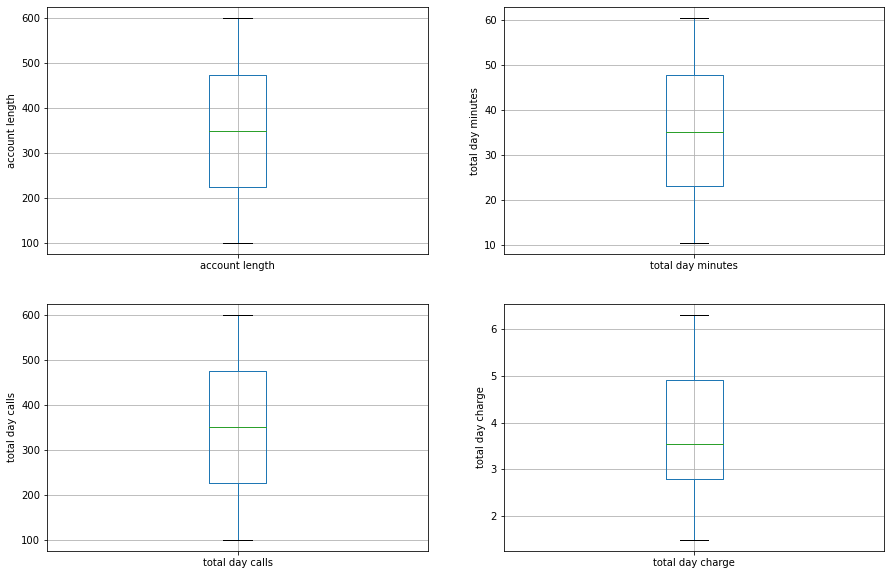

In [777]:
# draw boxplots to visualize outliers
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.boxplot(column='account length')
fig.set_title('')
fig.set_ylabel('account length')

plt.subplot(2, 2, 2)
fig = df.boxplot(column='total day minutes')
fig.set_title('')
fig.set_ylabel('total day minutes')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='total day calls')
fig.set_title('')
fig.set_ylabel('total day calls')

plt.subplot(2, 2, 4)
fig = df.boxplot(column='total day charge')
fig.set_title('')
fig.set_ylabel('total day charge')

The above boxplots confirm that there are lot of outliers in these variables.

Checking the distribution of variables

I will plot the histograms to check distributions to find out if they are normal or skewed. If the variable follows normal distribution, then I will do Extreme Value Analysis otherwise if they are skewed, I will find IQR (Interquantile range).

Text(0, 0.5, 'churn')

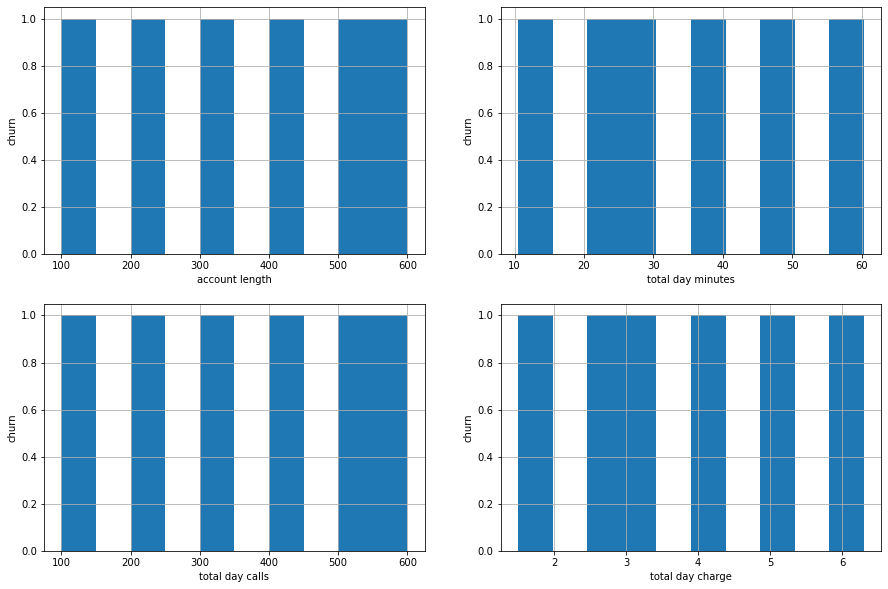

In [778]:
# plot histogram to check distribution
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df["account length"].hist(bins=10)
fig.set_xlabel('account length')
fig.set_ylabel('churn')

plt.subplot(2, 2, 2)
fig = df["total day minutes"].hist(bins=10)
fig.set_xlabel('total day minutes')
fig.set_ylabel('churn')

plt.subplot(2, 2, 3)
fig = df["total day calls"].hist(bins=10)
fig.set_xlabel('total day calls')
fig.set_ylabel('churn')

plt.subplot(2, 2, 4)
fig = df["total day charge"].hist(bins=10)
fig.set_xlabel('total day charge')
fig.set_ylabel('churn')

We can see that all the four variables are normally distributed. So, i will use Extreme Value Analysis to find the outliers

In [779]:
# Prepare the data
data = {
    'account length': [208, 215, 209, 224, 243],
    'number vmail messages': [51],
    'total day minutes': [332.9, 337.4, 326.5, 350.8, 335.5],
    'total day calls': [158, 163, 36, 40, 158],
    'total day charge': [15.71, 15.56, 2.03]  # Example data; adjust as needed
}
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in data.items()]))


In [780]:
def calculate_outlier_ranges(df, column_name):
    data = df[column_name].dropna()  # Drop NaN values
    
    # Calculate mean and standard deviation
    mean = data.mean()
    std_dev = data.std()
    
    # Define the number of standard deviations to determine outliers
    num_std_dev = 3
    
    # Calculate outlier boundaries
    lower_bound = mean - num_std_dev * std_dev
    upper_bound = mean + num_std_dev * std_dev
    
    return lower_bound, upper_bound

# List of columns to check
columns_to_check = [
    'account length', 'total day minutes',
    'total day calls', 'total day charge'
]

# Calculate and print outlier ranges for each column
for column in columns_to_check:
    lower_bound, upper_bound = calculate_outlier_ranges(df, column)
    print(f"Outlier range for column '{column}':")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print()

Outlier range for column 'account length':
Lower Bound: 176.4606414445253
Upper Bound: 263.1393585554747

Outlier range for column 'total day minutes':
Lower Bound: 309.82125002915245
Upper Bound: 363.41874997084756

Outlier range for column 'total day calls':
Lower Bound: -89.0574917367505
Upper Bound: 311.05749173675053

Outlier range for column 'total day charge':
Lower Bound: -12.465625389537195
Upper Bound: 34.6656253895372



In [781]:
#Load the dataset afresh to confirm the columns present
df = pd.read_csv("C:\\Users\\User\\OneDrive\\Desktop\\bigml_59c28831336c6604c800002a.csv")

# Check the columns
print("Columns in DataFrame:", df.columns)

Columns in DataFrame: Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


8. Declare feature vector and target variable

In [782]:
X = df.drop(['churn'], axis=1)

y = df['churn']

9. Split data into separate training and test set

In [783]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [784]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((2666, 20), (667, 20))

10. Feature Engineering
Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

First, I will display the categorical and numerical variables again separately.

In [785]:
# Function to check missing values
def check_missing_values(df, dataset_name):
    print(f"Missing values in {dataset_name}:")
    missing_counts = df.isnull().sum()
    missing_counts = missing_counts[missing_counts > 0]
    if missing_counts.empty:
        print("No missing values.")
    else:
        print(missing_counts)
    print()

# Check missing values in training and testing sets
check_missing_values(X_train, 'X_train')
check_missing_values(X_test, 'X_test')

# Identify categorical and numerical columns
categorical_columns = X_train.select_dtypes(include=['object', 'bool']).columns
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# Function to summarize missing values for categorical and numerical data separately
def summarize_missing_values(df, categorical_cols, numerical_cols, dataset_name):
    print(f"Missing values in {dataset_name}:")
    
    # Categorical columns
    cat_missing = df[categorical_cols].isnull().sum()
    cat_missing = cat_missing[cat_missing > 0]
    
    # Numerical columns
    num_missing = df[numerical_cols].isnull().sum()
    num_missing = num_missing[num_missing > 0]
    
    if not cat_missing.empty:
        print("Categorical Columns with Missing Values:")
        print(cat_missing)
    else:
        print("No missing values in categorical columns.")
    
    if not num_missing.empty:
        print("Numerical Columns with Missing Values:")
        print(num_missing)
    else:
        print("No missing values in numerical columns.")
    
    print()

# Summarize missing values for categorical and numerical data in both training and testing sets
summarize_missing_values(X_train, categorical_columns, numerical_columns, 'X_train')
summarize_missing_values(X_test, categorical_columns, numerical_columns, 'X_test')

Missing values in X_train:
No missing values.

Missing values in X_test:
No missing values.

Missing values in X_train:
No missing values in categorical columns.
No missing values in numerical columns.

Missing values in X_test:
No missing values in categorical columns.
No missing values in numerical columns.



We donot have missing values in all the columns

In [786]:
#Convert Boolean to Integer
df['churn'] = df['churn'].astype(int)

In [787]:
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

In [788]:
# Check for non-numeric values in categorical columns
categorical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in categorical_columns:
    print(f"Column: {col}")
    print(df[~df[col].apply(pd.to_numeric, errors='coerce').notna()][col])

Column: account length
Series([], Name: account length, dtype: int64)
Column: area code
Series([], Name: area code, dtype: int64)
Column: number vmail messages
Series([], Name: number vmail messages, dtype: int64)
Column: total day minutes
Series([], Name: total day minutes, dtype: float64)
Column: total day calls
Series([], Name: total day calls, dtype: int64)
Column: total day charge
Series([], Name: total day charge, dtype: float64)
Column: total eve minutes
Series([], Name: total eve minutes, dtype: float64)
Column: total eve calls
Series([], Name: total eve calls, dtype: int64)
Column: total eve charge
Series([], Name: total eve charge, dtype: float64)
Column: total night minutes
Series([], Name: total night minutes, dtype: float64)
Column: total night calls
Series([], Name: total night calls, dtype: int64)
Column: total night charge
Series([], Name: total night charge, dtype: float64)
Column: total intl minutes
Series([], Name: total intl minutes, dtype: float64)
Column: total in

In [789]:
print(df.isnull().sum())

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [790]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'account length': [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 243  23   1 205
 200   5   9 178 181 182 217 177 210  29 180   2  17   7 212 232 192 195
 197 225 184 191 201  15 183 202   8 175   4 188 204 221]
Unique values in 'area code': [415 408 510]
Unique values in 'number vmail messages': [25 26  0 24 37 27

In [791]:
# List of categorical columns
categorical_columns = ['state', 'phone number', 'international plan', 'voice mail plan']
boolean_columns = ['churn']

# Convert categorical columns using Label Encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string if necessary
    label_encoders[col] = le

# Convert boolean columns
df[boolean_columns] = df[boolean_columns].astype(int)

# Verify the data types after conversion
print(df.dtypes)

state                       int32
account length              int64
area code                   int64
phone number                int32
international plan          int32
voice mail plan             int32
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int32
dtype: object


In [792]:
# Identify categorical and numerical columns
categorical_columns = ['state', 'phone number', 'international plan', 'voice mail plan']
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Create a Column Transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),  # Handle missing values for numerical data
            ('scaler', StandardScaler())  # Scale numerical features
        ]), numerical_columns),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values for categorical data
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Convert categorical features to one-hot encoded
        ]), categorical_columns)
    ]
)

# Create the full pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=0))
])

In [793]:
# Fit the model
model.fit(X_train, y_train)

# Check training accuracy
print(f"Training Accuracy: {model.score(X_train, y_train):.4f}")

# Check testing accuracy
print(f"Testing Accuracy: {model.score(X_test, y_test):.4f}")

Training Accuracy: 0.9025
Testing Accuracy: 0.8486


11. Feature Scaling
we should map all the feature variables onto the same scale. 

In [794]:
X_train.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.351463,437.351838,7.998500,179.960315,100.424231,30.593792,201.581808,100.087022,17.134659,201.218492,100.057389,9.054906,10.240548,4.477494,2.765439,1.554389
std,39.902158,42.488511,13.572182,54.233805,20.116856,9.219742,51.032044,20.031025,4.337756,50.615479,19.814583,2.277747,2.813472,2.439908,0.759618,1.317883
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,144.650000,87.000000,24.590000,166.925000,87.000000,14.192500,167.100000,86.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.400000,100.000000,30.500000,202.450000,100.000000,17.205000,201.200000,100.000000,9.055000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,19.000000,216.000000,114.000000,36.720000,236.200000,114.000000,20.080000,235.675000,114.000000,10.607500,12.100000,6.000000,3.270000,2.000000
max,232.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


12. Model training